<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Images are stored in the form of pixels and there are 60,000 images each having 28 rows and 28 columns
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

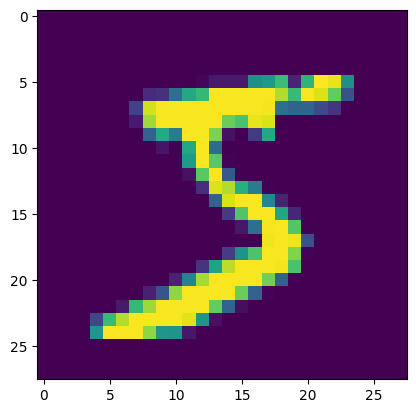

In [5]:
# We can show or convert these pixels values into images
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
# we have to divide each pixel value by 255 to normalise it so that our model converge fast and we get weights and bias values fast
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2835 - accuracy: 0.9192 - val_loss: 0.1546 - val_accuracy: 0.9566
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1263 - accuracy: 0.9627 - val_loss: 0.1153 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0854 - accuracy: 0.9746 - val_loss: 0.1012 - val_accuracy: 0.9693
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0911 - val_accuracy: 0.9710
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0804 - val_accuracy:

In [12]:
# Now predict the values using predict function. This will show diffrent probalilty values for each 10 classes
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[5.69201464e-10, 4.71262061e-14, 3.13222858e-06, ...,
        9.99956429e-01, 4.20607194e-08, 5.48045045e-06],
       [5.71423768e-13, 8.41844905e-09, 9.99999940e-01, ...,
        1.42485014e-19, 7.83215892e-09, 1.03267994e-16],
       [1.09254904e-06, 9.98222351e-01, 9.20618942e-04, ...,
        1.55701462e-04, 6.69421337e-04, 6.71113582e-07],
       ...,
       [4.04207511e-13, 2.37045979e-13, 4.15614028e-12, ...,
        5.26809387e-08, 2.62585420e-08, 1.81748885e-06],
       [7.18594542e-12, 1.75288505e-16, 6.93236633e-14, ...,
        7.07310051e-14, 4.08372244e-07, 1.28041503e-15],
       [5.38766189e-13, 2.10818965e-13, 8.03695738e-12, ...,
        3.84236214e-17, 6.64018130e-14, 4.51537467e-15]], dtype=float32)

In [13]:
# we will store it in a variable
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [14]:
type(y_prob)

numpy.ndarray

In [15]:
y_pred=y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9737

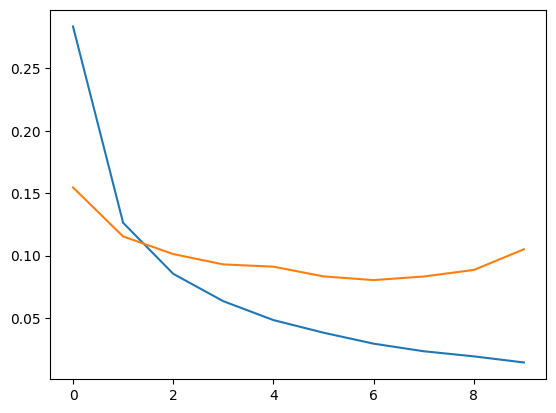

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

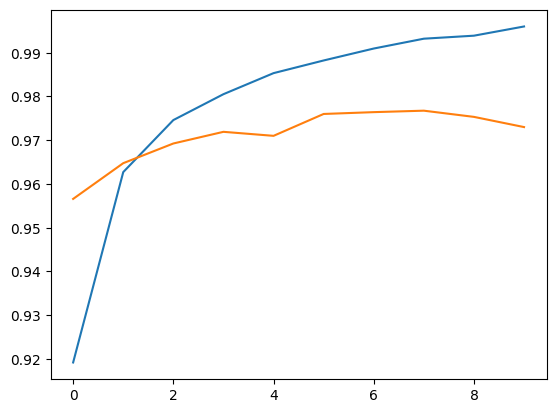

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

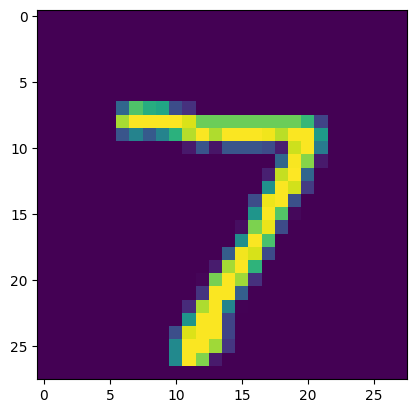

In [22]:
plt.imshow(X_test[0])

In [23]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 64ms/step


array([7])